In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/SOCR-HeightWeight.csv")
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df['Height(Inches)'].min()

60.27836

Let's plot the distribution of height and weight

<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

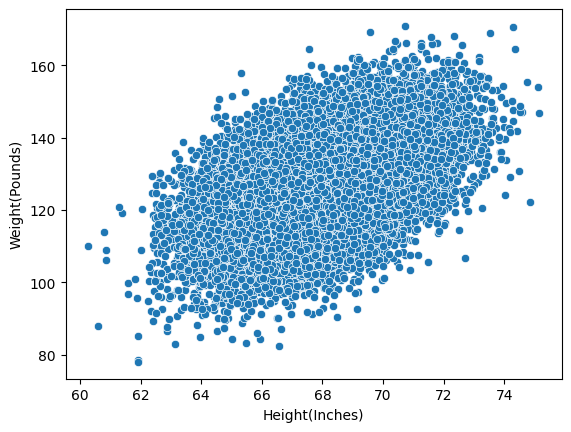

In [ ]:
sns.scatterplot(data=df, x='Height(Inches)',y='Weight(Pounds)')


In [ ]:
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Weight(Pounds)', axis=1)
y = df['Weight(Pounds)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(17500, 2)
(7500, 2)


## KNN Regressor

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

listt = []
for i in range(1,25):

  model = neighbors.KNeighborsRegressor(n_neighbors = i)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  error = np.sqrt(mean_squared_error(y_test, y_pred))

  listt.append(error)

  print('{} neighour with RMSE error = {}'.format(i,error))

1 neighour with RMSE error = 14.570643122679387
2 neighour with RMSE error = 12.845035788044136
3 neighour with RMSE error = 12.338957459082721
4 neighour with RMSE error = 12.119843858003659
5 neighour with RMSE error = 11.989321168420023
6 neighour with RMSE error = 11.964834985818737
7 neighour with RMSE error = 11.935864946882173
8 neighour with RMSE error = 11.91246804349591
9 neighour with RMSE error = 11.891022484302733
10 neighour with RMSE error = 11.870706460698342
11 neighour with RMSE error = 11.854080375711387
12 neighour with RMSE error = 11.875530408191148
13 neighour with RMSE error = 11.872309809942276
14 neighour with RMSE error = 11.868501414844522
15 neighour with RMSE error = 11.846393400464118
16 neighour with RMSE error = 11.831311846761066
17 neighour with RMSE error = 11.831237627275513
18 neighour with RMSE error = 11.813690028357831
19 neighour with RMSE error = 11.808807384685302
20 neighour with RMSE error = 11.788056669922154
21 neighour with RMSE error = 

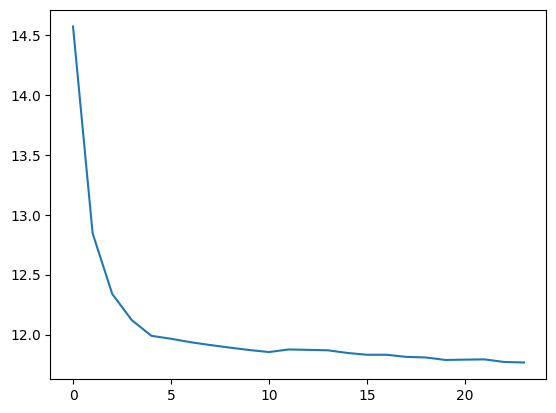

In [ ]:
plt.plot(listt)

## Support vector regressor

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE after applying svm: {}".format(error))

RMSE after applying svm: 11.515003491732834


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
param_grid = {"max_depth": [3, 5],
              "max_features": [3, 5],
              "min_samples_split": [2, 3, 10],
              "criterion": ['poisson', 'squared_error']}

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(dt, param_grid = param_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson'], 'max_depth': [3, 5],
                         'max_features': [3, 5],
                         'min_samples_split': [2, 3, 10]})

In [ ]:
gs.best_score_

0.24949446654145682

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features=5)

In [ ]:
y_pred = gs.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE after apply decision tree: {}".format(error))

RMSE after apply decision tree: 10.132952238629223


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3],
              "min_samples_split": [2, 3],
              "criterion": ['poisson', 'squared_error']}

In [ ]:
grid_search = GridSearchCV(rf, param_grid = param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson', 'squared_error'],
                         'max_depth': [3, None], 'max_features': [1, 3],
                         'min_samples_split': [2, 3]})

In [ ]:
grid_search.best_score_

0.2563074143600108

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=3, max_features=3,
                      min_samples_split=3)

In [ ]:
y_pred = grid_search.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSR after applying random forest: {}".format(error))

RMSR after applying random forest: 10.095643260054318
